## Importing the Dependencies

In [ ]:
# compare countries.ipynb

# Step 1: Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Optional: nicer plots
plt.rcParams['figure.figsize'] = (12,6)
sns.set_style('whitegrid')

In [6]:
# Step 2: Load the cleaned data files
import pandas as pd
benin = pd.read_csv('../data/benin-malanville_clean.csv')
sierra = pd.read_csv('../data/sierraleone-bumbuna_clean.csv')
togo = pd.read_csv('../data/togo-dapaong_qc_clean.csv')

# Step 3: Add a new column to identify each country
benin['Country'] = 'benin-malanville'
sierra['Country'] = 'sierraleone-bumbuna'
togo['Country'] = 'togo-dapaong_qc'

# Step 4: Combine all three into one dataset
solar_data = pd.concat([benin, sierra, togo])
summary = solar_data.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)

ghi_benin = benin['GHI']
ghi_sierra = sierra['GHI']
ghi_togo = togo['GHI']

## Boxplots for GHI, DNI, DHI (colored by country)

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['GHI', 'DNI', 'DHI']
palette_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']  # one color per country

for metric in metrics:
    plt.figure(figsize=(8,5))
    sns.boxplot(
        x='Country',
        y=metric,
        data=solar_data,
        hue='Country',          # add hue to fix warning
        palette=palette_colors
    )
    plt.title(f'{metric} Comparison Across Countries')
    plt.ylabel(metric)
    plt.xlabel('Country')
    plt.show()


## Summary table (mean, median, standard deviation)

In [8]:
# Step 6: Create summary table of key statistics
summary = solar_data.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std']).round(2)
summary

GHI                    DNI                    DHI  \
                       mean median     std    mean median     std    mean   
Country                                                                     
benin-malanville     240.34    1.8  330.87  167.19   -0.1  261.71  106.04   
sierraleone-bumbuna  193.81    0.3  288.11   -0.16   -0.1    0.13  108.32   
togo-dapaong_qc      229.79    2.1  321.60  148.72    0.0  247.77  109.15   

                                    
                    median     std  
Country                             
benin-malanville       1.6  147.20  
sierraleone-bumbuna   -0.1  152.07  
togo-dapaong_qc        2.5  147.50

In [7]:
from scipy.stats import f_oneway

# One-way ANOVA for GHI
ghi_benin = benin['GHI']
ghi_sierra = sierra['GHI']
ghi_togo = togo['GHI']

f_stat, p_val = f_oneway(ghi_benin, ghi_sierra, ghi_togo)
print("ANOVA for GHI across countries: F =", f_stat, ", p =", p_val)


ANOVA for GHI across countries: F = 3171.000749740508 , p = 0.0


In [ ]:
- Sierra Leone has the highest median GHI, but also shows wide variability.
- Benin has lower DNI values compared to the other countries.
- Togo shows relatively consistent DHI values with fewer extreme outliers.

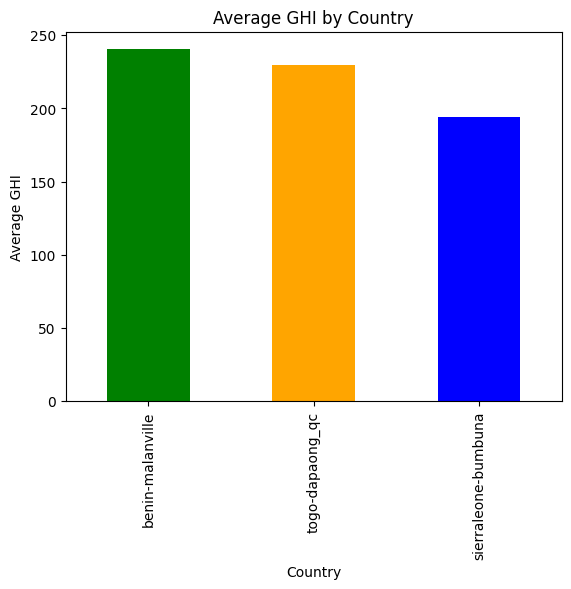

In [9]:
import matplotlib.pyplot as plt
avg_ghi = solar_data.groupby('Country')['GHI'].mean().sort_values(ascending=False)
avg_ghi.plot(kind='bar', color=['green','orange','blue'])
plt.ylabel('Average GHI')
plt.title('Average GHI by Country')
plt.show()